# Python for Data Analysis II 
## Individual assignment - Optimizing a portfolio


## Question 1

*1 point*


##### Load the data and rearrange it as a pandas DataFrame with the following structure:

- One column per stock and concept: Open, High, Low, Close, Volume
- Date as index (properly parsed)
- Rows sorted by date, ascending

Be ready for dealing with errors in the names and some missing values.

Paste here the `.dtypes` of the resulting DataFrame.

In [527]:
import pandas as pd 

In [528]:
df = pd.read_csv('stocks_unclean.csv')
df.head()

,date,variable,value
0,2020-07-14,high_AAPL,9.725500e+01
1,2021-10-22,volume_AMZN,3.139100e+06
2,2021-06-04,volume_MSFT,2.528110e+07
3,2021-06-28,volume_AMZN,2.242800e+06
4,2021-11-23,low_GOOG,NaN


In [529]:
pd.set_option('display.max_columns', 85) #Changing column displayed in the dataset
pd.set_option('display.max_rows', 85) #Changing rows displayed in the dataset

In [530]:
df = pd.read_csv('stocks_unclean.csv', parse_dates=['date'], index_col = 'date', dayfirst=True)
df.sort_values(by = 'date', ascending = True, inplace = True)
df.head()

,variable,value
date,,
2019-12-31,high_GOOG,1.338000e+03
2019-12-31,high_AAPL,7.342000e+01
2019-12-31,open_MSFT,1.567700e+02
2019-12-31,volume_MSFT,1.836940e+07
2019-12-31,close_AMZN,1.847840e+03


In [531]:
#Checking # of rows and columns
df.shape

(10447, 2)

In [532]:
#Checking column types
df.dtypes 

variable     object
value       float64
dtype: object

In [533]:
# Checking misspelled variable names 
df['variable'].unique()

array(['high_GOOG', 'high_AAPL', 'open_MSFT', 'volume_MSFT', 'close_AMZN',
       'volume_AMZN', 'open_GOOG', 'low_AAPL', 'close_AAPL', 'low_MSFT',
       'close_MSFT', 'open_AAPL', 'volume_AAPL', 'volume_GOOG',
       'open_AMZN', 'high_AMZ', 'close_GOOG', 'low_AMZN', 'low_GOOG',
       'high_MSFT', 'open_APL', 'high_AMZN', 'close_AMZ', 'close_GOG',
       'volume_AMZ', 'high_APL', 'close_APL', nan, 'volume_APL',
       'high_GOG', 'open_AMZ', 'volume_MST', 'open_MST', 'close_MST',
       'volume_GOG', 'low_GOG', 'high_MST', 'low_MST', 'low_AMZ',
       'open_GOG', 'low_APL'], dtype=object)

In [534]:
# Checking null values
df.isnull().any()

variable    True
value       True
dtype: bool

In [535]:
# Counting null values
df.isnull().sum()

variable    29
value       78
dtype: int64

In [536]:
# Data cleaning: Replacing with the right names of the stock (GOOG, MSFT, AMZN, AAPL)
# high
df['variable']= df['variable'].replace(['high_APL', 'high_GOG', 'high_MST', 'high_AMZ', ], ['high_AAPL', 'high_GOOG', 'high_MSFT', 'high_AMZN'])
# low
df['variable']= df['variable'].replace(['low_APL', 'low_GOG', 'low_MST', 'low_AMZ', ], ['low_AAPL', 'low_GOOG', 'low_MSFT', 'low_AMZN'])
# open
df['variable']= df['variable'].replace(['open_APL', 'open_GOG', 'open_MST', 'open_AMZ', ], ['open_AAPL', 'open_GOOG', 'open_MSFT', 'open_AMZN'])
# close
df['variable']= df['variable'].replace(['close_APL', 'close_GOG', 'close_MST', 'close_AMZ', ], ['close_AAPL', 'close_GOOG', 'close_MSFT', 'close_AMZN'])
# volume
df['variable']= df['variable'].replace(['volume_APL', 'volume_GOG', 'volume_MST', 'volume_AMZ', ], ['volume_AAPL', 'volume_GOOG', 'volume_MSFT', 'volume_AMZN'])

df

,variable,value
date,,
2019-12-31,high_GOOG,1.338000e+03
2019-12-31,high_AAPL,7.342000e+01
2019-12-31,open_MSFT,1.567700e+02
2019-12-31,volume_MSFT,1.836940e+07
2019-12-31,close_AMZN,1.847840e+03
...,...,...
2022-01-25,close_AAPL,1.597800e+02
2022-01-25,open_AMZN,2.844850e+03
2022-01-25,high_MSFT,2.949900e+02


In [537]:
# Checking if any NaN value
len(df.loc[df['value']=='NaN'].sort_index(ascending = True))

0

In [538]:
#Checking if misspelled variable names were changed
len(df.loc[df['variable']=='low_APL'].sort_index(ascending = True))

0

In [539]:
df.isna().sum()

variable    29
value       78
dtype: int64

In [540]:
# Rearranged new pandas DataFrame
# Filled na values with the price of the next day 
df= df.pivot_table(
    index = 'date',
    columns = 'variable'
).sort_index(ascending=True)
df.fillna(method='ffill', inplace=True)
df 

value                                                    \
variable    close_AAPL   close_AMZN   close_GOOG  close_MSFT   high_AAPL   
date                                                                       
2019-12-31   73.412498  1847.839966  1337.020020  157.699997   73.419998   
2020-01-02   75.087502  1898.010010  1367.369995  160.619995   75.150002   
2020-01-03   74.357498  1874.969971  1360.660034  158.619995   75.144997   
2020-01-06   74.949997  1902.880005  1394.209961  159.029999   74.989998   
2020-01-07   74.597504  1906.859985  1393.339966  157.580002   75.224998   
...                ...          ...          ...         ...         ...   
2022-01-19  166.229996  3125.979980  2713.040039  303.329987  171.080002   
2022-01-20  164.509995  3033.350098  2670.129883  301.600006  169.679993   
2022-01-21  162.410004  2852.860107  2601.840088  296.029999  166.330002   
2022-01-24  161.619995  2890.879883  2607.439941  296.369995  162.300003   
2022-01-25  159.779999  2799.719971  2534.709961  288.489990  162.759995   

                                                                           \
variable      high_AMZN    high_GOOG   high_MSFT    low_AAPL     low_AMZN   
date                                                                        
2019-12-31  1853.260010  1338.000000  157.770004   72.379997  1832.229980   
2020-01-02  1898.010010  1368.140015  160.729996   73.797501  1864.150024   
2020-01-03  1886.199951  1372.500000  159.949997   74.125000  1864.500000   
2020-01-06  1903.689941  1396.500000  159.100006   73.187500  1860.000000   
2020-01-07  1913.890015  1402.989990  159.669998   74.370003  1892.040039   
...                 ...          ...         ...         ...          ...   
2022-01-19  3185.000000  2767.989990  313.910004  165.940002  3125.000000   
2022-01-20  3160.000000  2758.239990  311.649994  164.179993  3027.020020   
2022-01-21  3018.000000  2695.209961  304.109985  162.300003  2841.409912   
2022-01-24  2898.899902  2615.570068  297.109985  154.699997  2707.040039   
2022-01-25  2872.000000  2586.770020  294.989990  157.020004  2762.899902   

                                                                           \
variable       low_GOOG    low_MSFT   open_AAPL    open_AMZN    open_GOOG   
date                                                                        
2019-12-31  1329.084961  156.449997   72.482498  1842.000000  1330.109985   
2020-01-02  1341.550049  158.330002   74.059998  1875.000000  1341.550049   
2020-01-03  1345.543945  158.330002   74.287498  1864.500000  1347.859985   
2020-01-06  1345.543945  156.509995   73.447502  1860.000000  1350.000000   
2020-01-07  1390.380005  157.320007   74.959999  1904.500000  1397.939941   
...                 ...         ...         ...          ...          ...   
2022-01-19  2710.000000  302.700012  170.000000  3175.239990  2738.770020   
2022-01-20  2662.889893  301.140015  166.979996  3135.320068  2730.280029   
2022-01-21  2600.020020  295.609985  164.419998  2999.000000  2660.239990   
2022-01-24  2492.839111  276.049988  160.020004  2780.000000  2520.550049   
2022-01-25  2527.560059  285.170013  158.979996  2844.850098  2568.709961   

                                                                         
variable     open_MSFT  volume_AAPL volume_AMZN volume_GOOG volume_MSFT  
date                                                                     
2019-12-31  156.770004  100805600.0   2506500.0    961800.0  18369400.0  
2020-01-02  158.779999  135480400.0   4029000.0   1406600.0  22622100.0  
2020-01-03  158.320007  146322800.0   3764400.0   1186400.0  21116200.0  
2020-01-06  157.080002  118387200.0   4061800.0   1732300.0  20813700.0  
2020-01-07  159.320007  108872000.0   4044900.0   1502700.0  21634100.0  
...                ...          ...         ...         ...         ...  
2022-01-19  306.290009   94815000.0   2662100.0   1039800.0  45933900.0  
2022-01-20  309.070007   91420500.0   3598700.0   1096

In [541]:
#Applying and saving the na filling method in the df
df = df.resample('D').fillna(method='ffill')
df

value                                                    \
variable    close_AAPL   close_AMZN   close_GOOG  close_MSFT   high_AAPL   
date                                                                       
2019-12-31   73.412498  1847.839966  1337.020020  157.699997   73.419998   
2020-01-01   73.412498  1847.839966  1337.020020  157.699997   73.419998   
2020-01-02   75.087502  1898.010010  1367.369995  160.619995   75.150002   
2020-01-03   74.357498  1874.969971  1360.660034  158.619995   75.144997   
2020-01-04   74.357498  1874.969971  1360.660034  158.619995   75.144997   
...                ...          ...          ...         ...         ...   
2022-01-21  162.410004  2852.860107  2601.840088  296.029999  166.330002   
2022-01-22  162.410004  2852.860107  2601.840088  296.029999  166.330002   
2022-01-23  162.410004  2852.860107  2601.840088  296.029999  166.330002   
2022-01-24  161.619995  2890.879883  2607.439941  296.369995  162.300003   
2022-01-25  159.779999  2799.719971  2534.709961  288.489990  162.759995   

                                                                           \
variable      high_AMZN    high_GOOG   high_MSFT    low_AAPL     low_AMZN   
date                                                                        
2019-12-31  1853.260010  1338.000000  157.770004   72.379997  1832.229980   
2020-01-01  1853.260010  1338.000000  157.770004   72.379997  1832.229980   
2020-01-02  1898.010010  1368.140015  160.729996   73.797501  1864.150024   
2020-01-03  1886.199951  1372.500000  159.949997   74.125000  1864.500000   
2020-01-04  1886.199951  1372.500000  159.949997   74.125000  1864.500000   
...                 ...          ...         ...         ...          ...   
2022-01-21  3018.000000  2695.209961  304.109985  162.300003  2841.409912   
2022-01-22  3018.000000  2695.209961  304.109985  162.300003  2841.409912   
2022-01-23  3018.000000  2695.209961  304.109985  162.300003  2841.409912   
2022-01-24  2898.899902  2615.570068  297.109985  154.699997  2707.040039   
2022-01-25  2872.000000  2586.770020  294.989990  157.020004  2762.899902   

                                                                           \
variable       low_GOOG    low_MSFT   open_AAPL    open_AMZN    open_GOOG   
date                                                                        
2019-12-31  1329.084961  156.449997   72.482498  1842.000000  1330.109985   
2020-01-01  1329.084961  156.449997   72.482498  1842.000000  1330.109985   
2020-01-02  1341.550049  158.330002   74.059998  1875.000000  1341.550049   
2020-01-03  1345.543945  158.330002   74.287498  1864.500000  1347.859985   
2020-01-04  1345.543945  158.330002   74.287498  1864.500000  1347.859985   
...                 ...         ...         ...          ...          ...   
2022-01-21  2600.020020  295.609985  164.419998  2999.000000  2660.239990   
2022-01-22  2600.020020  295.609985  164.419998  2999.000000  2660.239990   
2022-01-23  2600.020020  295.609985  164.419998  2999.000000  2660.239990   
2022-01-24  2492.839111  276.049988  160.020004  2780.000000  2520.550049   
2022-01-25  2527.560059  285.170013  158.979996  2844.850098  2568.709961   

                                                                         
variable     open_MSFT  volume_AAPL volume_AMZN volume_GOOG volume_MSFT  
date                                                                     
2019-12-31  156.770004  100805600.0   2506500.0    961800.0  18369400.0  
2020-01-01  156.770004  100805600.0   2506500.0    961800.0  18369400.0  
2020-01-02  158.779999  135480400.0   4029000.0   1406600.0  22622100.0  
2020-01-03  158.320007  146322800.0   3764400.0   1186400.0  21116200.0  
2020-01-04  158.320007  146322800.0   3764400.0   1186400.0  21116200.0  
...                ...          ...         ...         ...         ...  
2022-01-21  302.690002  122501300.0   8164200.0   2087000.0  57118300.0  
2022-01-22  302.690002  122501300.0   8164200.0   2087

In [542]:
#Checking null values after running data cleaning
df.isnull().any()

       variable   
value  close_AAPL     False
       close_AMZN     False
       close_GOOG     False
       close_MSFT     False
       high_AAPL      False
       high_AMZN      False
       high_GOOG      False
       high_MSFT      False
       low_AAPL       False
       low_AMZN       False
       low_GOOG       False
       low_MSFT       False
       open_AAPL      False
       open_AMZN      False
       open_GOOG      False
       open_MSFT      False
       volume_AAPL    False
       volume_AMZN    False
       volume_GOOG    False
       volume_MSFT    False
dtype: bool

In [543]:
#Counting null values after running data cleaning
df.isnull().sum()

       variable   
value  close_AAPL     0
       close_AMZN     0
       close_GOOG     0
       close_MSFT     0
       high_AAPL      0
       high_AMZN      0
       high_GOOG      0
       high_MSFT      0
       low_AAPL       0
       low_AMZN       0
       low_GOOG       0
       low_MSFT       0
       open_AAPL      0
       open_AMZN      0
       open_GOOG      0
       open_MSFT      0
       volume_AAPL    0
       volume_AMZN    0
       volume_GOOG    0
       volume_MSFT    0
dtype: int64

In [544]:
#Displaying final columns of rearranged df
df.columns

MultiIndex([('value',  'close_AAPL'),
            ('value',  'close_AMZN'),
            ('value',  'close_GOOG'),
            ('value',  'close_MSFT'),
            ('value',   'high_AAPL'),
            ('value',   'high_AMZN'),
            ('value',   'high_GOOG'),
            ('value',   'high_MSFT'),
            ('value',    'low_AAPL'),
            ('value',    'low_AMZN'),
            ('value',    'low_GOOG'),
            ('value',    'low_MSFT'),
            ('value',   'open_AAPL'),
            ('value',   'open_AMZN'),
            ('value',   'open_GOOG'),
            ('value',   'open_MSFT'),
            ('value', 'volume_AAPL'),
            ('value', 'volume_AMZN'),
            ('value', 'volume_GOOG'),
            ('value', 'volume_MSFT')],
           names=[None, 'variable'])

In [545]:
#Checking column types, making sure we are working with floats
df.dtypes

       variable   
value  close_AAPL     float64
       close_AMZN     float64
       close_GOOG     float64
       close_MSFT     float64
       high_AAPL      float64
       high_AMZN      float64
       high_GOOG      float64
       high_MSFT      float64
       low_AAPL       float64
       low_AMZN       float64
       low_GOOG       float64
       low_MSFT       float64
       open_AAPL      float64
       open_AMZN      float64
       open_GOOG      float64
       open_MSFT      float64
       volume_AAPL    float64
       volume_AMZN    float64
       volume_GOOG    float64
       volume_MSFT    float64
dtype: object

In [546]:
# Counting rows and columns
df.shape

(757, 20)

In [547]:
# Variable columns descriptive stats 
df.describe()

value                                                    \
variable  close_AAPL   close_AMZN   close_GOOG  close_MSFT   high_AAPL   
count     757.000000   757.000000   757.000000  757.000000  757.000000   
mean      119.626466  3010.357658  2016.096598  236.535165  120.947662   
std        30.489066   518.406950   595.133708   52.692726   30.664880   
min        56.092499  1676.609985  1056.619995  135.419998   57.125000   
25%        92.614998  2890.300049  1480.390015  202.020004   92.970001   
50%       124.610001  3200.000000  1807.209961  224.339996  125.559998   
75%       142.899994  3346.830078  2622.030029  281.399994  144.300003   
max       182.009995  3731.409912  3014.179932  343.109985  182.940002   

                                                                         \
variable    high_AMZN    high_GOOG   high_MSFT    low_AAPL     low_AMZN   
count      757.000000   757.000000  757.000000  757.000000   757.000000   
mean      3046.115373  2035.572322  238.769829  118.131681  2975.148676   
std        522.311344   597.245913   52.660337   30.357746   516.583111   
min       1759.449951  1071.319946  140.570007   53.152500  1626.030029   
25%       2955.560059  1495.494995  203.970001   90.910004  2871.000000   
50%       3233.000000  1824.829956  227.179993  122.769997  3163.679932   
75%       3381.500000  2643.659912  284.100006  141.690002  3308.500000   
max       3773.080078  3037.000000  349.670013  179.119995  3696.790039   

                                                                         \
variable     low_GOOG    low_MSFT   open_AAPL    open_AMZN    open_GOOG   
count      757.000000  757.000000  757.000000   757.000000   757.000000   
mean      1994.489104  233.881717  119.523719  3014.525788  2014.255801   
std        593.684142   52.645623   30.493946   520.933595   595.168391   
min       1013.536011  132.520004   57.020000  1641.510010  1056.510010   
25%       1465.089966  199.009995   91.962502  2912.010010  1479.119995   
50%       1773.535034  221.850006  124.070000  3203.870117  1798.099976   
75%       2611.959961  279.459991  143.070007  3349.649902  2632.820068   
max       2997.750000  342.200012  182.630005  3744.000000  3020.000000   

                                                                              
variable   open_MSFT   volume_AAPL   volume_AMZN   volume_GOOG   volume_MSFT  
count     757.000000  7.570000e+02  7.570000e+02  7.570000e+02  7.570000e+02  
mean      236.321783  1.250986e+08  4.208377e+06  1.595617e+06  3.217752e+07  
std        52.647426  6.759102e+07  1.934372e+06  7.424579e+05  1.490092e+07  
min       137.009995  4.100000e+07  1.451900e+06  3.468000e+05  1.055060e+07  
25%       201.600006  7.929540e+07  2.897000e+06  1.096600e+06  2.261220e+07  
50%       224.699997  1.074970e+08  3.723900e+06  1.412900e+06  2.782040e+07  
75%       282.119995  1.477124e+08  5.037600e+06  1.828400e+06  3.695370e+07  
max       344.619995  4.265100e+08  1.556730e+07  4.329100e+06  9.701270e+07

## Question 2

*1.5 points*

#### Visualize the data as follows:

#### Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).

#### Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)

Attach the plots here.

In [548]:
# Importing matplot library and seaborn for ploting the data
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

In [549]:
# Defining variables to be used for plotting each stock's open and close price
#AAPL Open and Close prices
Open_AAPL = df['value']['open_AAPL']
Close_AAPL = df['value']['close_AAPL']
#AMZN Open and Close prices
Open_AMZN = df['value']['open_AMZN']
Close_AMZN = df['value']['close_AMZN']
#MSFT Open and Close prices
Open_MSFT = df['value']['open_MSFT']
Close_MSFT = df['value']['close_MSFT']
#GOOG Open and Close prices
Open_GOOG = df['value']['open_GOOG']
Close_GOOG = df['value']['close_GOOG']

## *Open and Close Stock Prices*

Text(0.5, 1.0, 'GOOG')

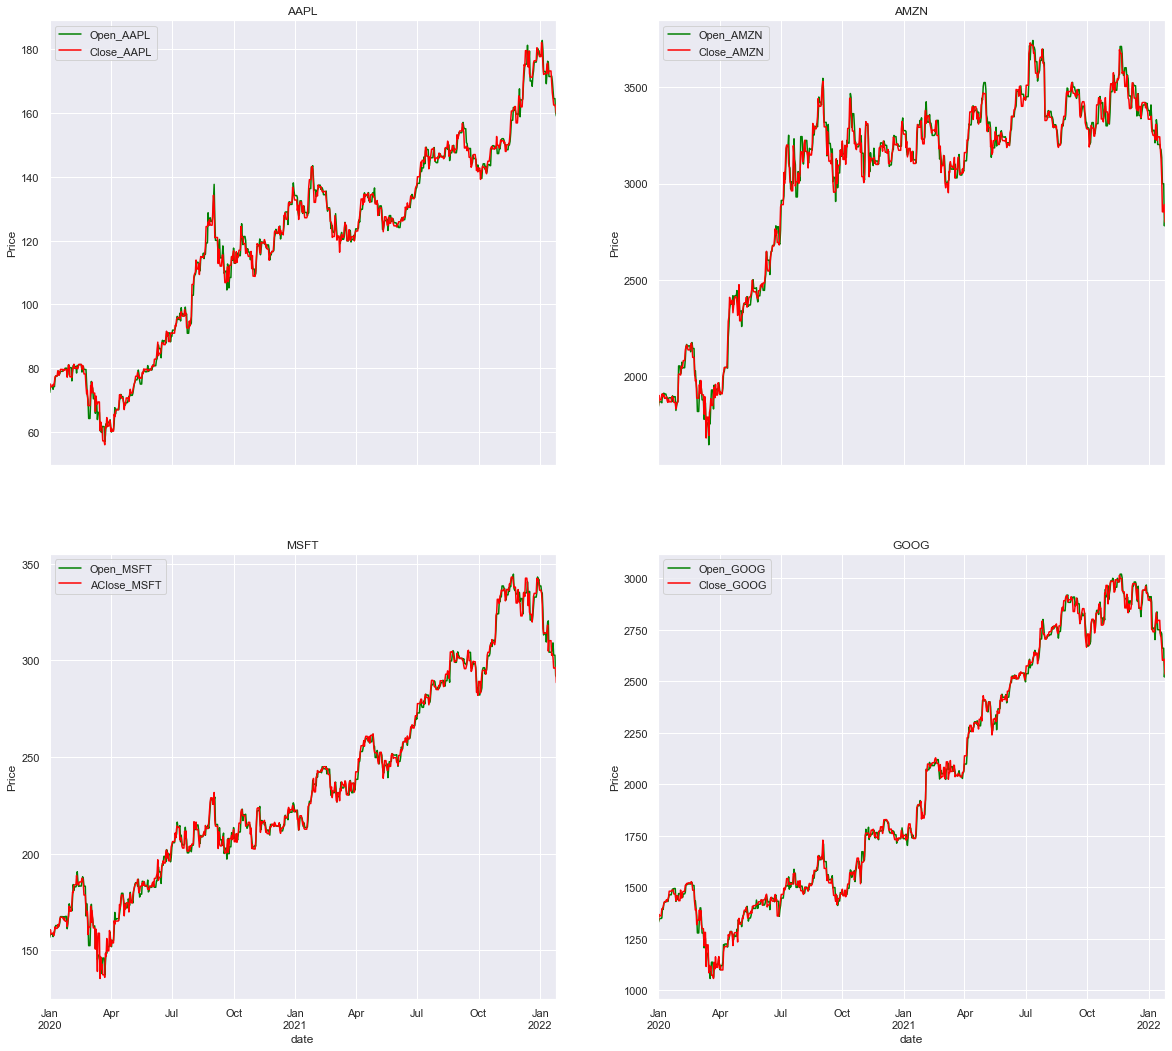

In [550]:
# Creating the axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18), sharex=True)  


Open_AAPL.plot(label='Open_AAPL',ax=axes[0, 0], color =["green"])
Close_AAPL.plot(label='Close_AAPL', ax=axes[0, 0], color =["red"])
axes[0, 0].legend() 
axes[0,0].set_ylabel("Price")
axes[0,0].set_title("AAPL")

Open_AMZN.plot(label='Open_AMZN', ax=axes[0, 1], color =["green"])
Close_AMZN.plot(label='Close_AMZN', ax=axes[0, 1], color =["red"])
axes[0, 1].legend() 
axes[0,1].set_ylabel("Price")
axes[0,1].set_title("AMZN")

Open_MSFT.plot(label='Open_MSFT',ax=axes[1, 0], color =["green"])
Close_MSFT.plot(label='AClose_MSFT',ax=axes[1, 0], color =["red"])
axes[1, 0].legend() 
axes[1,0].set_ylabel("Price")
axes[1,0].set_title("MSFT")

Open_GOOG.plot(label='Open_GOOG',ax=axes[1, 1], color =["green"])
Close_GOOG.plot(label='Close_GOOG',ax=axes[1, 1], color =["red"])
axes[1, 1].legend() 
axes[1,1].set_ylabel("Price")
axes[1,1].set_title("GOOG")

                                   

## *Weekly average of "Open" and "Close"*

Text(0.5, 1.0, 'GOOG')

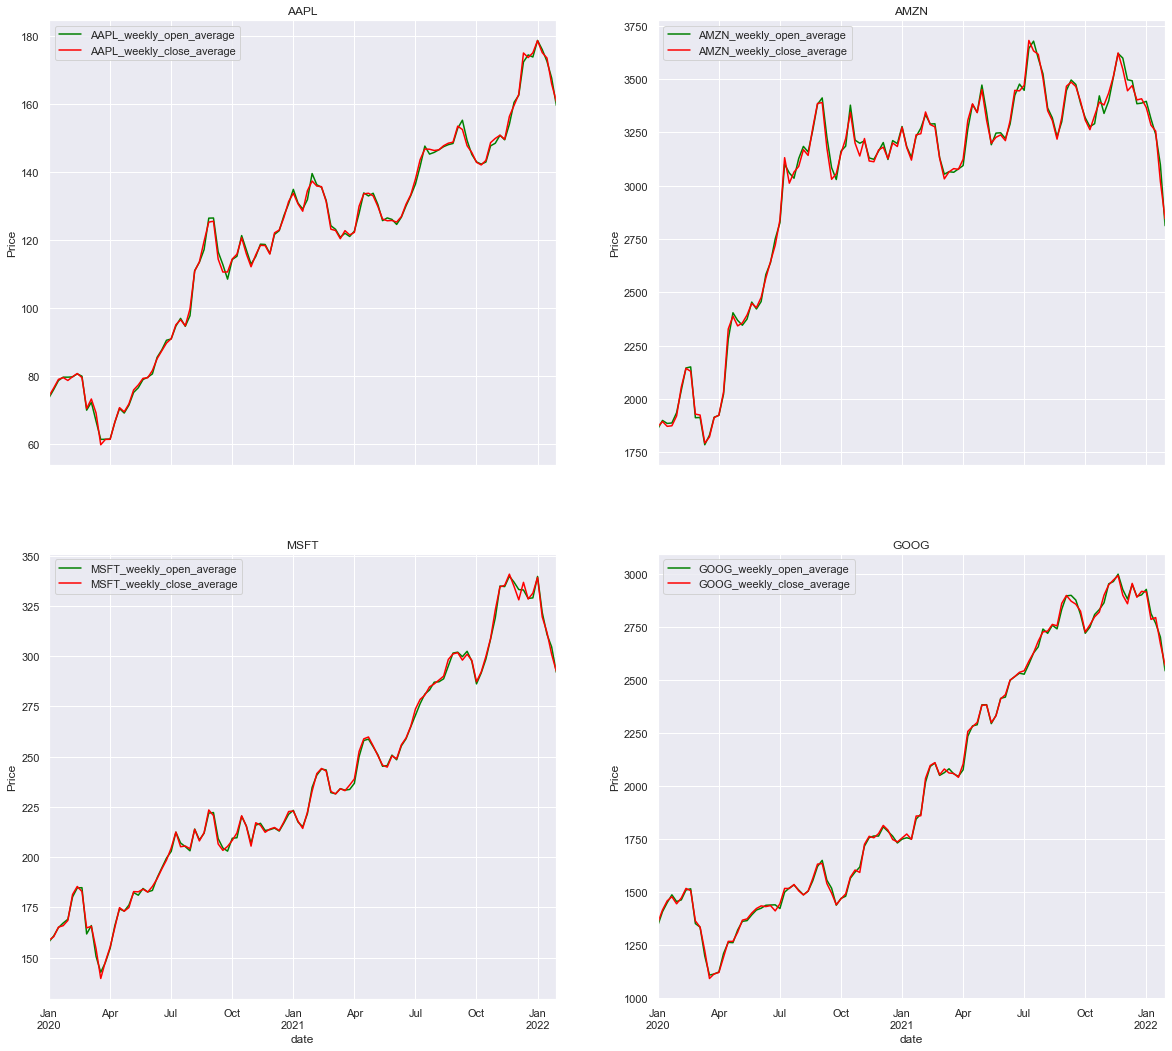

In [551]:
# Creating the axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18), sharex=True)  

# Defining new variables for each stock with the resample of the Open and Close prices by week and computing the mean
AAPL_weekly_open_average = Open_AAPL.resample('W').mean().plot(label='AAPL_weekly_open_average',ax=axes[0, 0], color ="green")
AAPL_weekly_close_average = Close_AAPL.resample('W').mean().plot(label='AAPL_weekly_close_average', ax=axes[0, 0], color ="red")
axes[0, 0].legend() 
axes[0,0].set_ylabel("Price")
axes[0,0].set_title("AAPL")
 
AMZN_weekly_open_average = Open_AMZN.resample('W').mean().plot(label='AMZN_weekly_open_average', ax=axes[0, 1], color ="green")
AMZN_weekly_close_average = Close_AMZN.resample('W').mean().plot(label='AMZN_weekly_close_average', ax=axes[0, 1], color ="red")
axes[0, 1].legend() 
axes[0,1].set_ylabel("Price")
axes[0,1].set_title("AMZN")
 
MSFT_weekly_open_average = Open_MSFT.resample('W').mean().plot(label = 'MSFT_weekly_open_average', ax=axes[1, 0], color ="green")
MSFT_weekly_close_average = Close_MSFT.resample('W').mean().plot(label = 'MSFT_weekly_close_average', ax=axes[1, 0], color ="red")
axes[1, 0].legend() 
axes[1,0].set_ylabel("Price")
axes[1,0].set_title("MSFT")
 
GOOG_weekly_open_average = Open_GOOG.resample('W').mean().plot(label = 'GOOG_weekly_open_average', ax=axes[1, 1], color ="green")
GOOG_weekly_close_average = Close_GOOG.resample('W').mean().plot(label = 'GOOG_weekly_close_average', ax=axes[1, 1], color ="red") 
axes[1, 1].legend() 
axes[1,1].set_ylabel("Price")
axes[1,1].set_title("GOOG")
 

## Add meaningful visualizations of your choice 
*(0.5 points)*

### *Daily returns*

In [552]:
#Defining a function to calculate the daily return for each stock adn storing in a variable
def daily_return(lookback, name, data):
    daily_return = (data["value"][f"close_{name}"] - data["value"][f"close_{name}"].shift(lookback))/ data["value"][f"close_{name}"].shift(lookback)*100
    return daily_return
#GOOG Daily returns
GOOG_daily_return = daily_return(1, "GOOG", df)
#AAPL Daily returns
AAPL_daily_return = daily_return(1, "AAPL", df)
#MSFT Daily returns
MSFT_daily_return = daily_return(1, "MSFT", df)
#AMZN Daily returns
AMZN_daily_return = daily_return(1, "AMZN", df)

Text(0, 0.5, 'Return')

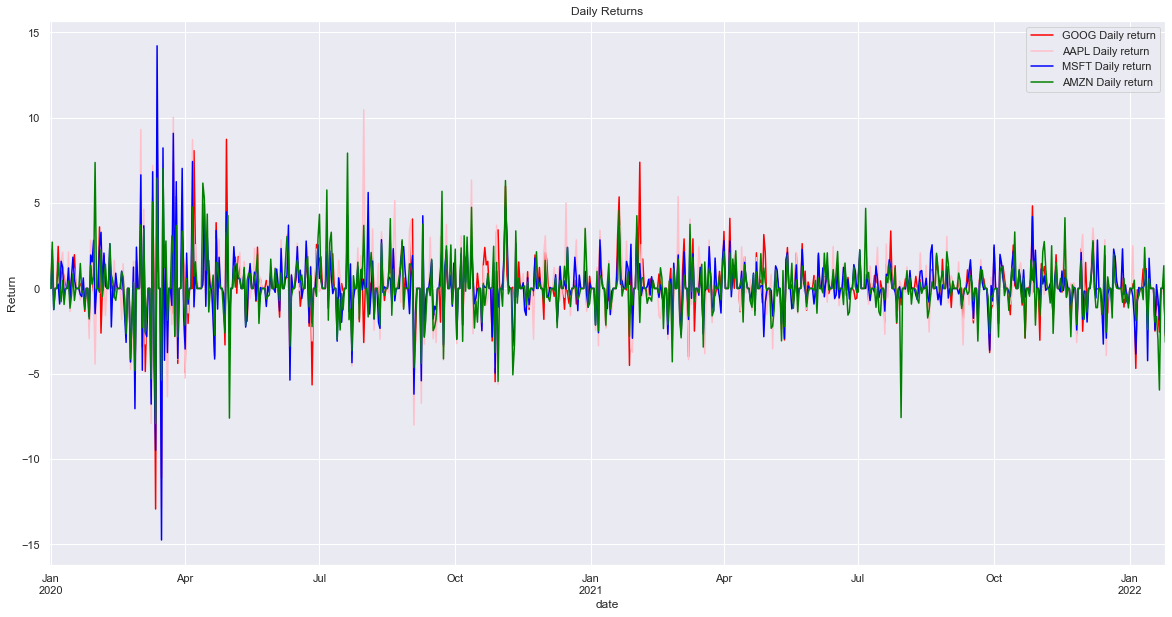

In [553]:
# Creating the axes for the plots
fig, ax = plt.subplots(figsize=(20,10))
#AMZN Daily returns
GOOG_daily_return.plot(label='GOOG Daily return', ax=ax, color ='red')
AAPL_daily_return.plot(label='AAPL Daily return', ax=ax, color='pink') 
MSFT_daily_return.plot(label='MSFT Daily return', ax=ax, color='blue')
AMZN_daily_return.plot(label='AMZN Daily return', ax=ax, color='green')
ax.legend()
ax.set_title("Daily Returns")
ax.set_ylabel("Return")

### *Daily returns distribution*

Text(0.5, 1.0, 'MSFT Daily Return Distribution')

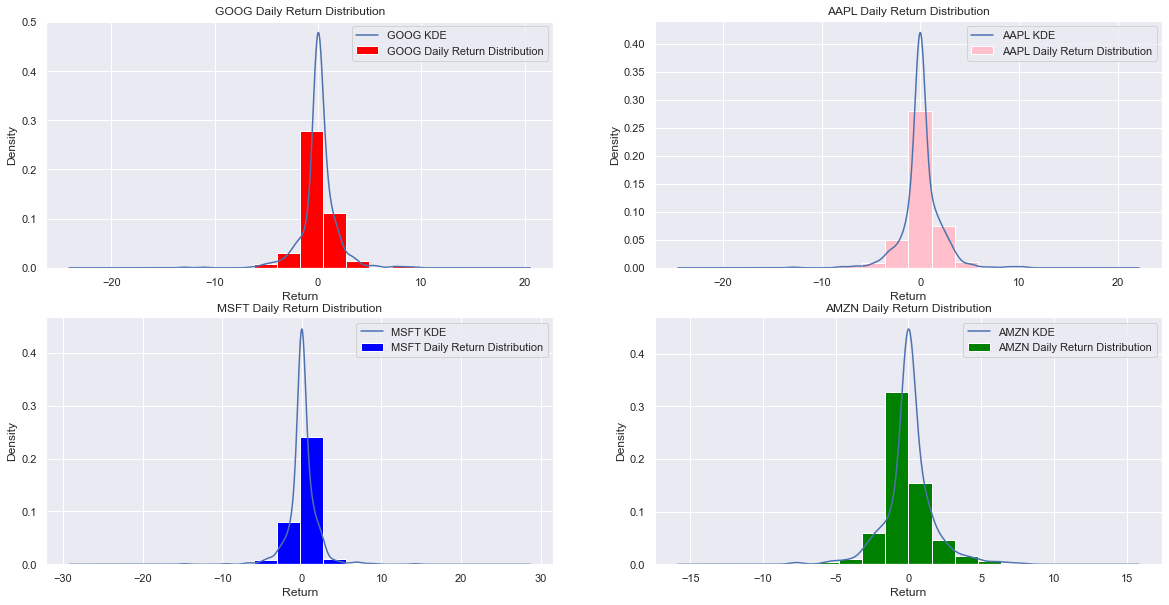

In [554]:
# Creating the axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) 


# Ploting a histogram and a kde for each of the stock's daily return
GOOG_daily_return.hist(alpha=1, density=True, ax=axes[0,0], color='red',label = 'GOOG Daily Return Distribution' )   
GOOG_daily_return.plot.kde(ax=axes[0,0], label = 'GOOG KDE')
axes[0,0].legend()
axes[0,0].set_xlabel("Return")
axes[0,0].set_title("GOOG Daily Return Distribution")
 
AAPL_daily_return.hist(alpha=1,density=True, ax=axes[0,1], color='pink', label = 'AAPL Daily Return Distribution') 
AAPL_daily_return.plot.kde(ax=axes[0,1], label = 'AAPL KDE') 
axes[0,1].legend()
axes[0,1].set_xlabel("Return")
axes[0,1].set_title("AAPL Daily Return Distribution")
 
AMZN_daily_return.hist(alpha=1, density=True, ax=axes[1,1], color='green', label = 'AMZN Daily Return Distribution')
AMZN_daily_return.plot.kde(ax=axes[1,1], label = 'AMZN KDE')
axes[1,1].legend()
axes[1,1].set_xlabel("Return")
axes[1,1].set_title("AMZN Daily Return Distribution")


MSFT_daily_return.hist(alpha=1, density=True, ax=axes[1,0], color='blue', label = 'MSFT Daily Return Distribution')
MSFT_daily_return.plot.kde(ax=axes[1,0], label = 'MSFT KDE') 
axes[1,0].legend()
axes[1,0].set_xlabel("Return")
axes[1,0].set_title('MSFT Daily Return Distribution')

### *Volume distribution*

Text(0.5, 1.0, 'AMZN')

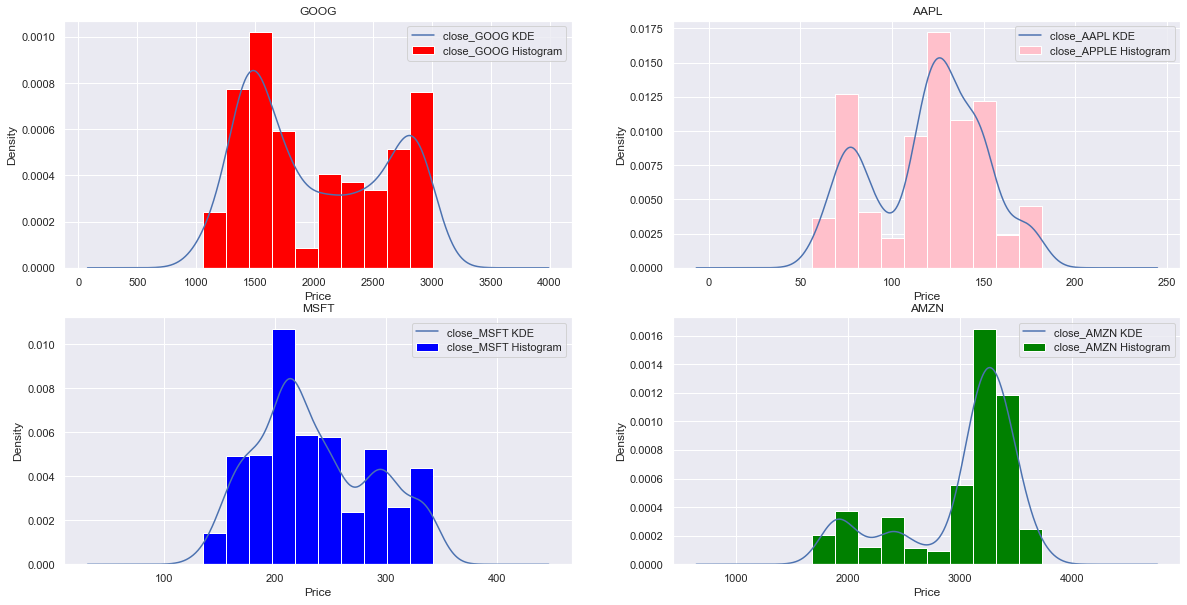

In [555]:
# Creating the axes for the plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10)) 

# Ploting a histogram and a kde for each of the stock's close price 
Close_GOOG.hist(alpha=1,density=True, ax=axes[0,0], color='red', label = 'close_GOOG Histogram') 
Close_GOOG.plot.kde(ax=axes[0,0], label = 'close_GOOG KDE') 
axes[0,0].legend()
axes[0,0].set_xlabel("Price")
axes[0,0].set_title("GOOG")

Close_AAPL.hist(alpha=1, density=True, ax=axes[0,1], color='pink',label = 'close_APPLE Histogram' )   
Close_AAPL.plot.kde(ax=axes[0,1], label = 'close_AAPL KDE')
axes[0,1].legend()
axes[0,1].set_xlabel("Price")
axes[0,1].set_title("AAPL")

Close_MSFT.hist(alpha=1, density=True, ax=axes[1,0], color='blue', label = 'close_MSFT Histogram')
Close_MSFT.plot.kde(ax=axes[1,0], label = 'close_MSFT KDE') 
axes[1,0].legend()
axes[1,0].set_xlabel("Price")
axes[1,0].set_title("MSFT")
 
Close_AMZN.hist(alpha=1, density=True, ax=axes[1,1], color='green', label = 'close_AMZN Histogram')
Close_AMZN.plot.kde(ax=axes[1,1], label = 'close_AMZN KDE')
axes[1,1].legend()
axes[1,1].set_xlabel("Price")
axes[1,1].set_title("AMZN")



# Question 3

*1 point*

#### Create a function that calculates the Return of Investment (ROI). Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it. 

$$ R O I = F V I - I V I /  I V I * 100 $$


- IVI: initial value of investment. This is the price at which you bought the stock
- FVI: final value of investment. This is the price at which you sold the stock
- ROI: Return of Investment. This is the percentage of increase in value of the investment

Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:

- lookback: the number of days you hold the stock
- name: the name of the stock, using the "Close" value of the stock
- data: the dataframe with the stock data

Paste here the result of `roi(365, "GOOG", df)`.

In [556]:
#Defining a function that receives parameters and looks up the IVI, FVI and computes the ROI as indiciated in the formula
def roi(lookback, name, data):
    ROI = (data["value"][f"close_{name}"] - data["value"][f"close_{name}"].shift(lookback))/ data["value"][f"close_{name}"].shift(lookback)*100
    return ROI

In [557]:
# Defining a variable to store the output of the GOOG 365 ROI,
GOOG_ROI_365 = roi(365, "GOOG", df)
round(GOOG_ROI_365,2)

date
2019-12-31      NaN
2020-01-01      NaN
2020-01-02      NaN
2020-01-03      NaN
2020-01-04      NaN
              ...  
2022-01-21    37.57
2022-01-22    36.86
2022-01-23    36.86
2022-01-24    37.16
2022-01-25    33.45
Freq: D, Name: close_GOOG, Length: 757, dtype: float64

<AxesSubplot:xlabel='date'>

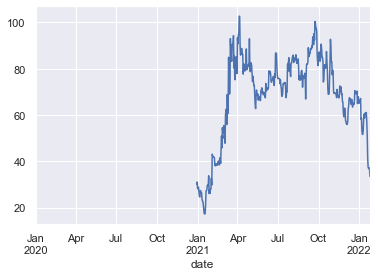

In [558]:
# Plotting the ROI_365 days
GOOG_ROI_365.plot()

In [559]:
# Defining a function to obtain the FVI 
def FVI(name, data):
    FVI =  data["value"][f"close_{name}"]
    return FVI

In [560]:
# Defining a function to obtain the IVI 
def IVI(lookback, name, data):
    IVI = data["value"][f"close_{name}"].shift(lookback)
    return IVI

In [561]:
# Exercising the function to get GOOG IVI
GOOG_IVI_365 = IVI(365, "GOOG", df)


In [562]:
# Exercising the function to get GOOG FVI
GOOG_FVI_365 = FVI("GOOG", df)


## Question 4

*1.5 points*

#### Apply the ROI function to the portfolio. Create as many ROI columns as different stocks you have in the portfolio and plot them, representing for each stock:

- ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
- ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
- ROI after holding the stock for 90 days (green, solid line) (0.5 points)

Attach here the ROI plots for AMZN.

In [563]:
#Creating as many ROI pandas series as different stocks in the portfolio and defining variables to store them
GOOG_ROI_365 = roi(365, "GOOG", df)
GOOG_ROI_180 = roi(180, "GOOG", df)
GOOG_ROI_90 = roi(90, "GOOG", df)

AAPL_ROI_365 = roi(365, "AAPL", df)
AAPL_ROI_180 = roi(180, "AAPL", df)
AAPL_ROI_90 = roi(90, "AAPL", df)

MSFT_ROI_365 = roi(365, "MSFT", df)
MSFT_ROI_180 = roi(180, "MSFT", df)
MSFT_ROI_90 = roi(90, "MSFT", df)

AMZN_ROI_365 = roi(365, "AMZN", df)
AMZN_ROI_180 = roi(180, "AMZN", df)
AMZN_ROI_90 = roi(90, "AMZN", df)


GOOG_ROI_365.dropna(inplace=True)
GOOG_ROI_180.dropna(inplace=True)
GOOG_ROI_90.dropna(inplace=True)

AAPL_ROI_365.dropna(inplace=True)
AAPL_ROI_180.dropna(inplace=True)
AAPL_ROI_90.dropna(inplace=True)

MSFT_ROI_365.dropna(inplace=True)
MSFT_ROI_180.dropna(inplace=True)
MSFT_ROI_90.dropna(inplace=True)

AMZN_ROI_365.dropna(inplace=True)
AMZN_ROI_180.dropna(inplace=True)
AMZN_ROI_90.dropna(inplace=True)

AMZN_ROI_180
AMZN_ROI_365
AMZN_ROI_90


date
2020-03-30     6.283552
2020-03-31     5.513465
2020-04-01     0.510532
2020-04-02     2.339237
2020-04-03     1.686427
                ...    
2022-01-21   -14.471075
2022-01-22   -14.471075
2022-01-23   -14.080057
2022-01-24   -14.371449
2022-01-25   -17.473007
Freq: D, Name: close_AMZN, Length: 667, dtype: float64

Text(0, 0.5, 'ROI')

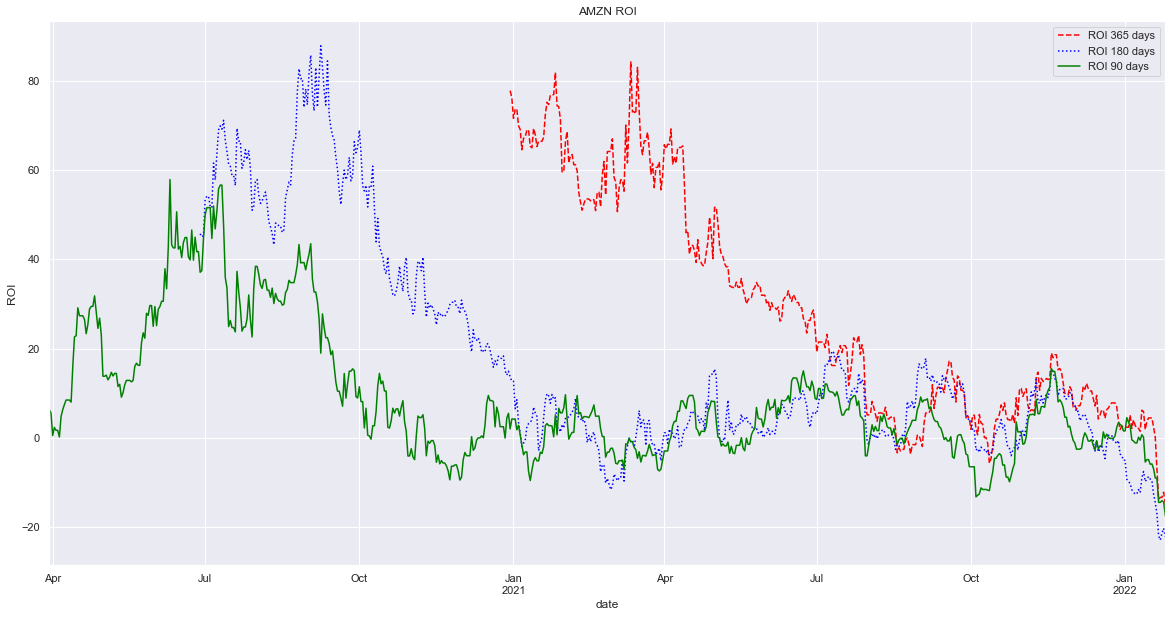

In [564]:
# Creating the axes for the plots
fig, ax = plt.subplots(figsize=(20,10))
#AMZN ROI
AMZN_ROI_365.plot(label='ROI 365 days', linestyle="dashed", ax=ax, color ="red")
AMZN_ROI_180.plot(label='ROI 180 days', linestyle="dotted", ax=ax, color='blue') 
AMZN_ROI_90.plot(label='ROI 90 days', ax=ax, linestyle= "solid", color='green')
ax.legend()
ax.set_title("AMZN ROI")
ax.set_ylabel("ROI")

Text(0, 0.5, 'AAPL ROI')

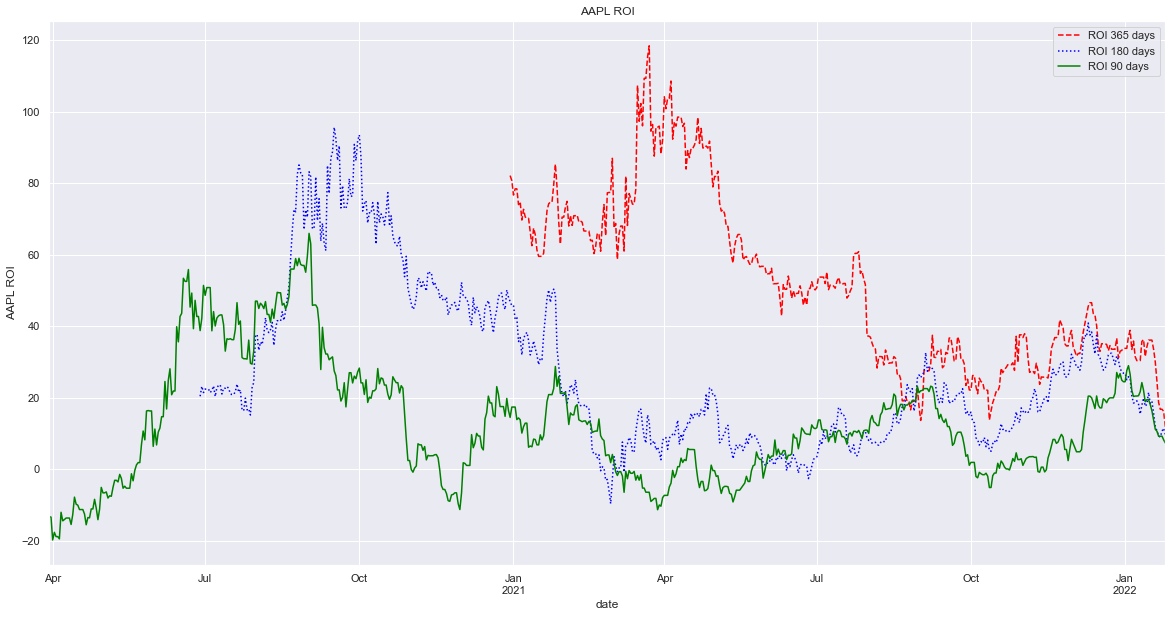

In [565]:
# Creating the axes for the plots
fig, ax = plt.subplots(figsize=(20,10))
#AAPL ROI
AAPL_ROI_365.plot(label='ROI 365 days', linestyle="dashed", ax=ax, color ="red")
AAPL_ROI_180.plot(label='ROI 180 days', linestyle="dotted", ax=ax, color='blue') 
AAPL_ROI_90.plot(label='ROI 90 days', ax=ax, linestyle= "solid", color='green')
ax.legend()
ax.set_title("AAPL ROI")
ax.set_ylabel("AAPL ROI")

Text(0, 0.5, 'ROI')

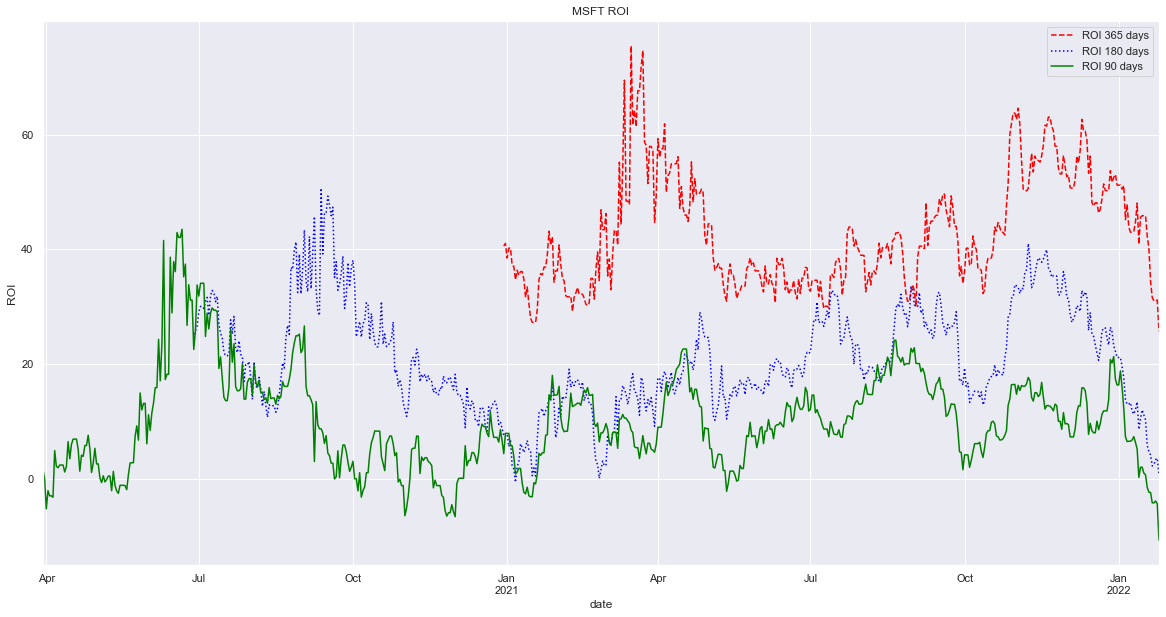

In [566]:
# Creating the axes for the plots
fig, ax = plt.subplots(figsize=(20,10))
#MSFT ROI
MSFT_ROI_365.plot(label='ROI 365 days', linestyle="dashed", ax=ax, color ="red")
MSFT_ROI_180.plot(label='ROI 180 days', linestyle="dotted", ax=ax, color='blue') 
MSFT_ROI_90.plot(label='ROI 90 days', linestyle= "solid", ax=ax, color='green')
ax.legend()
ax.set_title("MSFT ROI")
ax.set_ylabel("ROI")

Text(0, 0.5, 'ROI')

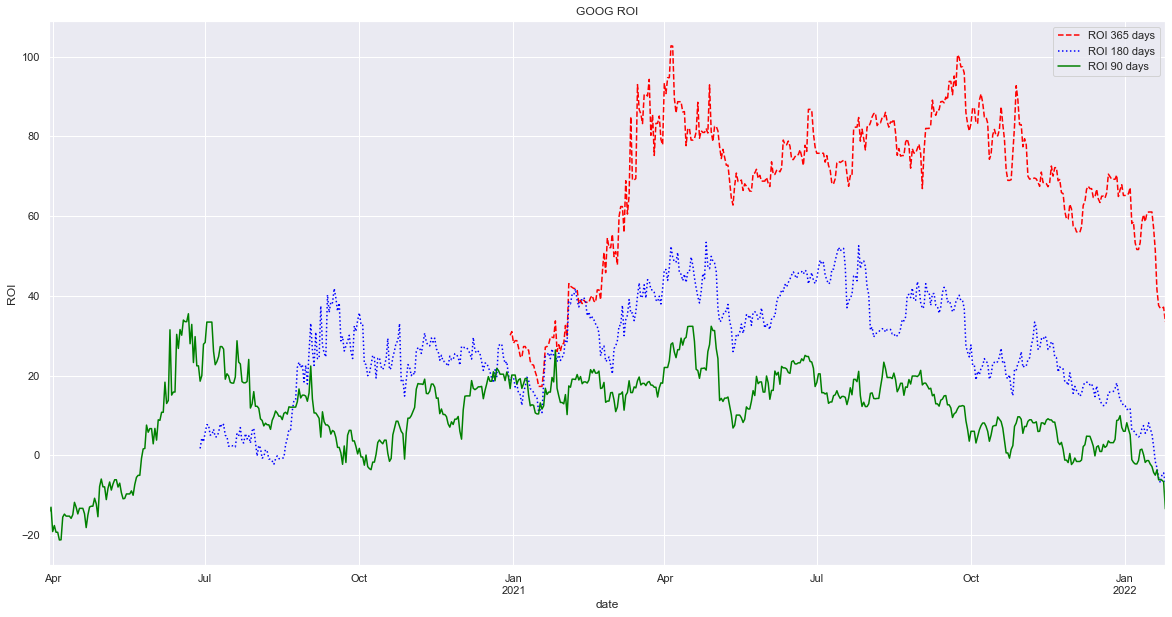

In [567]:
# Creating the axes for the plots

fig, ax = plt.subplots(figsize=(20,10))
#GOOG ROI
GOOG_ROI_365.plot(label='ROI 365 days', linestyle="dashed", ax=ax, color ="red")
GOOG_ROI_180.plot(label='ROI 180 days', linestyle="dotted", ax=ax, color='blue') 
GOOG_ROI_90.plot(label='ROI 90 days', linestyle= "solid", ax=ax, color='green')
ax.legend()
ax.set_title("GOOG ROI")
ax.set_ylabel("ROI")

## Question 5

##### The average ROI is a single number that comes from computing the overall mean of the ROI over the whole period of the series. 

##### Given these two portfolios, which one has the best average ROI, with a lookback of 365 days? (Keep in mind that ROI is a percentage and you can't average it directly - you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period)



   Portfolio 1:

       AAPL 40%

       GOOG 30%

       MSFT 20%

       AMZN 10%



   Portfolio 2:

       AAPL 30%

       GOOG 20%

       MSFT 10%

       AMZN 40%



Paste here the average ROI of both portfolios (two numbers).

In [568]:
# Using the IVI function to obtain the buy price to multiply by the ROI and convert it to a return in currency
def IVI(lookback, name, data):
    IVI =  data["value"][f"close_{name}"].shift(lookback)
    return IVI

In [569]:
# Creating vatriables with the buy price of each stock (IVI)
GOOG_IVI_365
AAPL_IVI_365 = IVI(365, "AAPL", df)
MSFT_IVI_365 = IVI(365, "MSFT", df)
AMZN_IVI_365 = IVI(365, "AMZN", df)

In [570]:
# Calculating the average ROI for portfolio 1 and storing it in a new pandas series
#Portfolio 1:
#AAPL 40%
#GOOG 30%
#MSFT 20%
#AMZN 10%
portfolio_1_average_roi = (
    (((AAPL_ROI_365 / 100) * AAPL_IVI_365).mean())*0.4 + \
    (((GOOG_ROI_365 / 100) * GOOG_IVI_365).mean())*0.3 +  \
    (((MSFT_ROI_365 / 100) * MSFT_IVI_365).mean())*0.2 + \
    (((AMZN_ROI_365 / 100) * AMZN_IVI_365).mean())*0.1
    )
print((f'Portfolio 1 Average ROI = {round(portfolio_1_average_roi,2)}'))

Portfolio 1 Average ROI = 402.46


In [571]:
# Calculating the average ROI for portfolio 2 and storing it in a new pandas series
portfolio_2_average_roi = (
    (((AAPL_ROI_365 / 100) * AAPL_IVI_365).mean())*0.3 + \
    (((GOOG_ROI_365 / 100) * GOOG_IVI_365).mean())*0.2 +  \
    (((MSFT_ROI_365 / 100) * MSFT_IVI_365).mean())*0.1 + \
    (((AMZN_ROI_365 / 100) * AMZN_IVI_365).mean())*0.4
    )
print((f'Portfolio 2 Average ROI = {round(portfolio_2_average_roi,2)}'))

Portfolio 2 Average ROI = 476.9


## Question 6

1 point

Find a better combination in your portfolio. The new combination should beat the best portfolio that you found in the previous exercise.

In [572]:
import numpy as np
# Creating a function to generate different combinations of portfolio
def generate_random_portfolios(num_portfolios):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for weight in range(num_portfolios):
        # Randomly assign floats to our 4 equities
        weights = np.random.random(4)
        # Convert the randomized floats to percentages (summing to 100)
        weights = np.round(weights / np.sum(weights), 2)
        # Add to our portfolio weight array
        weight_array.append(weights)
        
    return weight_array

In [573]:
#Defining a variable to store the result of the function and display the first 5 rows of the array with the portfolios
generated_portfolios = generate_random_portfolios(10)
generated_portfolios[:5]

[array([0.24, 0.24, 0.26, 0.26]),
 array([0.14, 0.29, 0.22, 0.36]),
 array([0.45, 0.28, 0.08, 0.19]),
 array([0.35, 0.15, 0.16, 0.34]),
 array([0.1 , 0.34, 0.35, 0.21])]

In [574]:
#Creating a for loop to assign random weights to each stock, generating multiple different combinations of portfolios
best_portfolios = [] #Defining a variable to store the best portfolios
avg_roi_list = [] #Defining a variable for storing the avg roi per combination
for test in range(1000):
    generated_portfolios = generate_random_portfolios(10)
    for row in generated_portfolios:
        assigned_weight_dict = {}
        assigned_weight_dict['AAPL']=row[0]
        assigned_weight_dict['GOOG']=row[1]
        assigned_weight_dict['MSFT']=row[2]
        assigned_weight_dict['AMZN']=row[3]
        
        #Since GOOG is the stock that contributes the most to the AVG ROI, a minumum of 65% allocation is required to outperform Portf 2
        if assigned_weight_dict['GOOG']>0.65:
            best_portfolios.append(assigned_weight_dict)
            
        #Calculating the avg roi of the new combinations
    avg_roi = (
    (((AAPL_ROI_365 / 100) * AAPL_IVI_365).mean())*assigned_weight_dict['AAPL'] + \
    (((GOOG_ROI_365 / 100) * GOOG_IVI_365).mean())*assigned_weight_dict['GOOG'] + \
    (((MSFT_ROI_365 / 100) * MSFT_IVI_365).mean())*assigned_weight_dict['MSFT'] + \
    (((AMZN_ROI_365 / 100) * AMZN_IVI_365).mean())*assigned_weight_dict['AMZN']
    )
    avg_roi_list.append(avg_roi)
   
avg_roi = (
    (((AAPL_ROI_365 / 100) * AAPL_IVI_365).mean())*best_portfolios[1]['AAPL'] + \
    (((GOOG_ROI_365 / 100) * GOOG_IVI_365).mean())*best_portfolios[1]['GOOG'] + \
    (((MSFT_ROI_365 / 100) * MSFT_IVI_365).mean())*best_portfolios[1]['MSFT'] + \
    (((AMZN_ROI_365 / 100) * AMZN_IVI_365).mean())*best_portfolios[1]['AMZN']
)

print(f'Find a better combination in your portfolio = {best_portfolios[1]}')  #Displaying the first row of the combinations which outperforms portf #2
print(f'The new combination beats the best portfolio (2) found in the previous exercise. The average ROI is  = {round(avg_roi,2)}')
#Printing the highest avg of the portfolio 
print(f'The highest Average ROI found of the total combinations is = {max(avg_roi_list)}')

Find a better combination in your portfolio = {'AAPL': 0.06, 'GOOG': 0.87, 'MSFT': 0.0, 'AMZN': 0.07}
The new combination beats the best portfolio (2) found in the previous exercise. The average ROI is  = 930.48
The highest Average ROI found of the total combinations is = 930.4829598105684
